# By Disha Sharma

__I've performed exploratory data analysis for 'SampleSuperStore' dataset as a business manager. My aim was to find weak areas and find possible ways to improve them and increase profits. Also, I've mentioned a few basic business problems in between. I've explained every chart and interpreted them in the best possible way along with providing solutions and pointing out the existing problems.__ 

In [7]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [8]:
#importing the data
data=pd.read_csv('C:/Users/DISHA/Downloads/SampleSuperstore.csv')


In [9]:
# lets have a look at random 11 rows of our data
data.sample(11)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
793,Standard Class,Consumer,United States,San Francisco,California,94110,West,Office Supplies,Labels,9.960,2,0.0,4.5816
827,Standard Class,Consumer,United States,Lakeville,Minnesota,55044,Central,Office Supplies,Supplies,37.240,4,0.0,10.7996
3804,Standard Class,Consumer,United States,Jacksonville,North Carolina,28540,South,Office Supplies,Envelopes,35.008,4,0.2,13.1280
3604,Standard Class,Home Office,United States,Columbia,Maryland,21044,East,Furniture,Furnishings,25.160,2,0.0,8.5544
7041,Standard Class,Consumer,United States,New York City,New York,10009,East,Furniture,Furnishings,124.360,2,0.0,27.3592
5895,Standard Class,Home Office,United States,Los Angeles,California,90049,West,Office Supplies,Labels,44.400,3,0.0,22.2000
8941,First Class,Consumer,United States,Portland,Oregon,97206,West,Office Supplies,Binders,4.158,7,0.7,-3.4650
8337,Standard Class,Corporate,United States,Decatur,Alabama,35601,South,Office Supplies,Paper,23.920,4,0.0,11.7208
6589,Standard Class,Consumer,United States,Salem,Virginia,24153,South,Office Supplies,Supplies,231.720,2,0.0,11.5860
7473,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Art,13.568,4,0.2,3.2224


In [10]:
#Summarising the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
#total number of rows and columns
data.shape

(9994, 13)

__Dataset has 9994 rows and 13 columns__

In [12]:
#checking for duplicate rows
data.duplicated().sum()

17

__17 duplicate rows were found. These might alter the accuracy of our analysis, hence we eliminate them.__

In [13]:
#eliminating duplicate rows and getting the correct number of rows and columns
data.drop_duplicates(inplace=True)
data.shape

(9977, 13)

__So our data actually has 9977 rows now and the same 13 columns__

__Eliminate any columns that won't contribute to the data analysis. In this case we can eliminate the country column as the data given is just for one country; the USA. Also the postal codes won't help us.__

In [14]:
#eliminating country and postal code column
data=data.drop('Country', axis=1)
data.sample(11)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3261,First Class,Corporate,San Francisco,California,94109,West,Technology,Accessories,99.980,2,0.0,7.9984
8793,First Class,Corporate,Los Angeles,California,90008,West,Office Supplies,Fasteners,22.550,5,0.0,8.7945
5425,First Class,Consumer,Los Angeles,California,90045,West,Technology,Accessories,1649.950,5,0.0,659.9800
3902,Second Class,Home Office,Los Angeles,California,90045,West,Office Supplies,Storage,270.340,14,0.0,75.6952
8603,Standard Class,Corporate,San Antonio,Texas,78207,Central,Technology,Accessories,30.080,2,0.2,-5.2640
708,First Class,Consumer,New York City,New York,10035,East,Furniture,Bookcases,883.920,5,0.2,-110.4900
7529,Same Day,Corporate,San Francisco,California,94109,West,Office Supplies,Binders,17.040,3,0.2,5.5380
9494,Standard Class,Corporate,Broken Arrow,Oklahoma,74012,Central,Office Supplies,Binders,11.880,2,0.0,5.3460
4064,First Class,Consumer,Concord,North Carolina,28027,South,Office Supplies,Supplies,3.104,1,0.2,0.3492
2602,Same Day,Consumer,New York City,New York,10035,East,Technology,Machines,1349.850,3,0.0,364.4595


In [15]:
data=data.drop('Postal Code', axis=1)
data.sample(11)


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6272,First Class,Corporate,Palatine,Illinois,Central,Technology,Accessories,116.312,7,0.2,23.2624
9854,Standard Class,Consumer,San Francisco,California,West,Furniture,Furnishings,50.320,4,0.0,21.1344
2180,Standard Class,Consumer,New York City,New York,East,Office Supplies,Labels,44.400,3,0.0,22.2000
7408,Standard Class,Corporate,Los Angeles,California,West,Furniture,Furnishings,167.840,8,0.0,11.7488
9820,Standard Class,Corporate,Saint Petersburg,Florida,South,Office Supplies,Paper,42.240,10,0.2,13.2000
7734,Standard Class,Consumer,Seattle,Washington,West,Office Supplies,Art,12.420,3,0.0,5.2164
3582,Standard Class,Corporate,Jackson,Michigan,Central,Office Supplies,Art,3.900,2,0.0,1.5210
3867,Second Class,Consumer,San Diego,California,West,Technology,Accessories,148.320,9,0.0,63.7776
768,Standard Class,Corporate,Saint Petersburg,Florida,South,Furniture,Furnishings,310.880,2,0.2,23.3160
7764,Same Day,Corporate,Columbia,Maryland,East,Office Supplies,Art,17.520,3,0.0,5.2560


In [16]:
data.shape

(9977, 11)

__We have these 9977 rows and 11 columns for our exploratory data analysis as of now. We might eliminate the unfavourable datasets as we progress.__

In [17]:
#checking for null values
data.isnull().any()

Ship Mode       False
Segment         False
City            False
State           False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

__Result is false for all the 11 columns mentioned above which means we have no null data__

__One of the ways to perform exploratory data analysis is by measuring correlation.__

(4.0, 0.0)

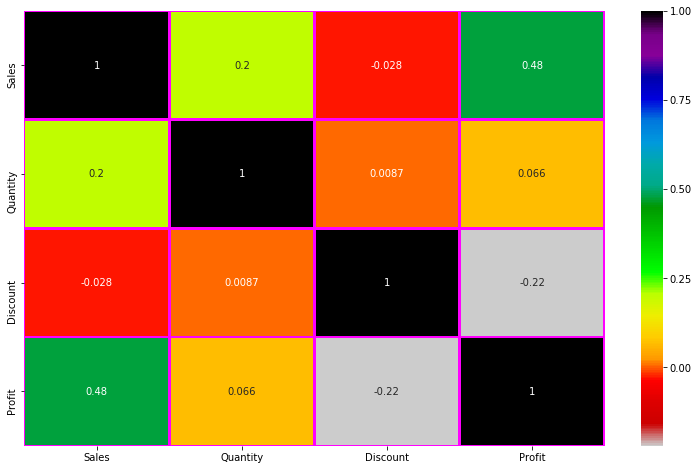

In [18]:
#Selecting numeric datatypes only
data_num=data.select_dtypes(include=[np.number])
#creating a correlation heatmap
fig = plt.figure(figsize=(13,8))

sns.heatmap(data_num.corr(),cmap='nipy_spectral_r', annot=True, linecolor='magenta', linewidths=1.5,)

b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)

According to our spectral index on the right,1 means a strong positive correlation and it goes on decreasing further towards the bottom of the spectrum index. One can easily figure out the correlation between two factors. As we can see above, there is no strong correlation between any two factors. __But the negative correlation between profit and discount gives the obvious indication that higher discounts lead to lesser profits.__

__Now we check for any outliers.They are values that are notably different, let's say very high or very low values as compared to other data points and they can cause problems in analysis__.

In [19]:
data_num.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [20]:
data_num.shape

(9977, 4)

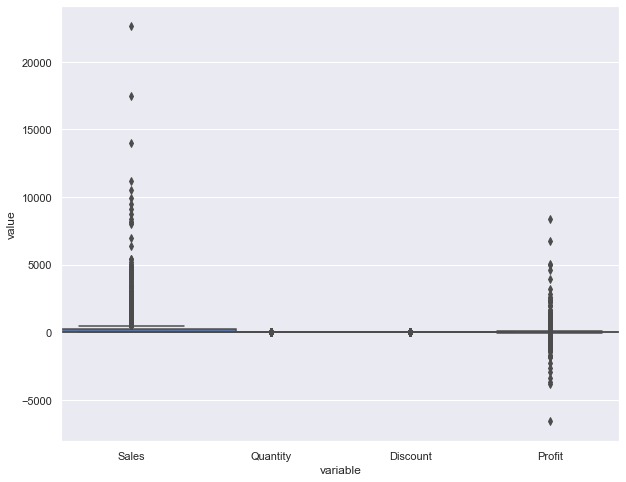

In [21]:
#detecting outliers using boxplot
plt.figure(figsize=[10,8])
sns.set(style="darkgrid")
sns.boxplot(x="variable", y="value", data=pd.melt(data_num), width=1.5)
plt.show()

__Sales and Profits have outliers, so we remove the rows in sales and profits which are outliers. For this purpose, we use the interquartile range method.__

# Interquartile range method

__Theoretically, any value below Q1-1.5(IQR) or above Q3+1.5(IQR) is an Outlier.__

In [22]:
#find Q1, Q3, and interquartile range for each column
Q1 = data_num.quantile(q=.25)
Q3 = data_num.quantile(q=.75)
IQR = data_num.apply(stats.iqr)


In [23]:
#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data2 = data[~((data_num < (Q1-1.5*IQR)) | (data_num > (Q3+1.5*IQR))).any(axis=1)]


In [24]:
#find how many rows are left in the dataframe 
data2.shape


(7127, 11)

__So for this new data set (data3), 2850 rows of numeric data have been eliminated considering them as outliers. The number of columns remain the same as in the previously defined dataset (data)__.

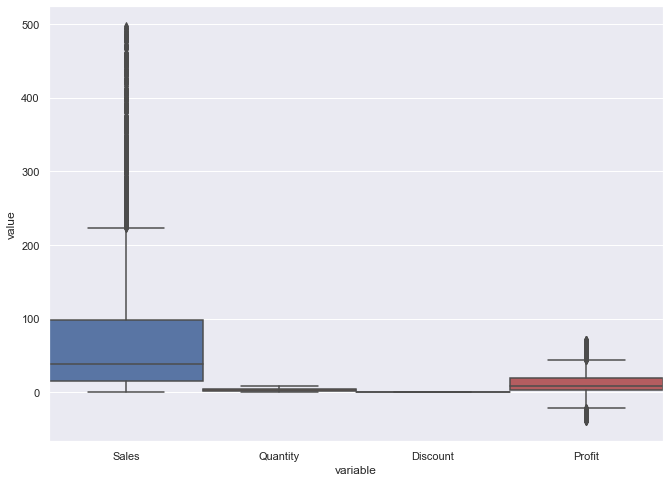

In [25]:
#selecting only numeric values
data2_num=data2.select_dtypes(include=[np.number])
# checking whether the outliers are removed or not(visual representation)
plt.figure(figsize=[11,8])
sns.set(style="darkgrid")
sns.boxplot(x="variable", y="value", data=pd.melt(data2_num), width=1)
plt.show()


__As we can see above, the number of outliers has been reduced significantly by the IQR method. We shall now proceed to more categorical data analysis.__

In [26]:
#displaying random rows of our new dataset without outliers
data2.sample(11)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1177,Standard Class,Consumer,Rockville,Maryland,East,Furniture,Chairs,172.500,2,0.0,51.7500
4369,Standard Class,Home Office,Lawrence,Indiana,Central,Office Supplies,Binders,104.900,5,0.0,50.3520
9708,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,19.960,2,0.0,5.5888
2906,Standard Class,Consumer,Eagan,Minnesota,Central,Office Supplies,Paper,8.560,2,0.0,3.8520
8092,Second Class,Home Office,New York City,New York,East,Office Supplies,Art,109.900,5,0.0,32.9700
1593,Same Day,Consumer,Los Angeles,California,West,Office Supplies,Paper,13.440,3,0.0,6.5856
9025,Standard Class,Corporate,New York City,New York,East,Technology,Accessories,139.960,4,0.0,9.7972
8144,Standard Class,Consumer,San Diego,California,West,Technology,Phones,159.968,4,0.2,-31.9936
3772,Second Class,Consumer,Columbia,South Carolina,South,Technology,Accessories,62.910,3,0.0,22.6476
9978,Standard Class,Home Office,Los Angeles,California,West,Office Supplies,Binders,13.376,4,0.2,4.6816


In [27]:
data2['Category'].value_counts()

Office Supplies    4670
Furniture          1262
Technology         1195
Name: Category, dtype: int64

__We have counts of each category above.__

In [28]:
#number of Sub-categories products are divided.
data2['Sub-Category'].nunique()

17

__We have 17 sub categories in our dataframe.__

In [29]:
#number of products in each sub-category
data2['Sub-Category'].value_counts()

Paper          1225
Binders         784
Art             778
Furnishings     737
Storage         632
Accessories     601
Phones          573
Labels          346
Chairs          320
Appliances      296
Envelopes       226
Fasteners       211
Supplies        172
Bookcases       113
Tables           92
Machines         18
Copiers           3
Name: Sub-Category, dtype: int64

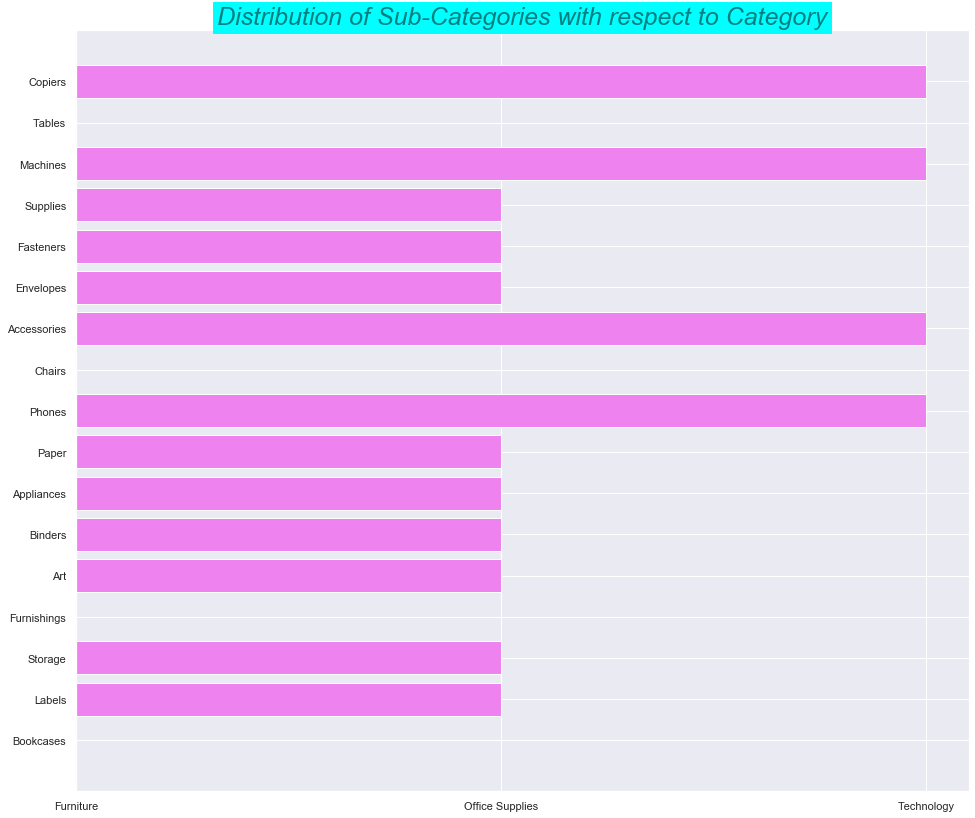

In [30]:
#Distribution of Sub-categories with respect to Category
plt.figure(figsize=(16,14))
plt.barh('Sub-Category','Category',data=data2,color='violet')
plt.title(label="Distribution of Sub-Categories with respect to Category", fontsize='25', fontstyle='oblique',color='teal',backgroundcolor='cyan')
plt.show()

__The above graph indicates that there are 4 sub-categories of furniture, 9 of office supplies and 4 of technology.__

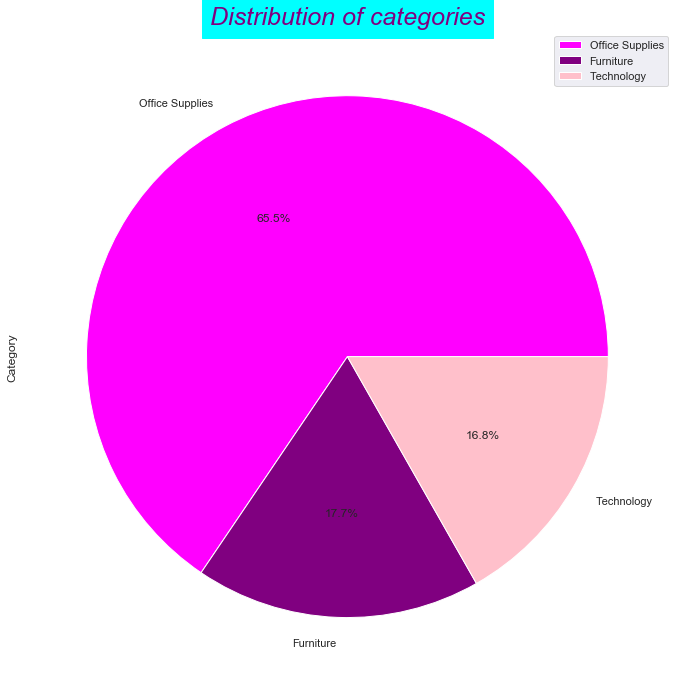

In [31]:
#piechart for distribution of the 3 main categories
plt.figure(figsize=(16,12))
colors_list=['magenta','purple','pink']
data2['Category'].value_counts().plot.pie(autopct="%1.1f%%",colors=colors_list)
plt.title(label="Distribution of categories",color='purple',backgroundcolor='cyan',fontstyle='oblique',fontsize='25')
plt.legend(loc=1)
plt.show()

__The stores have a wider variety of office supplies, followed by furniture and then technology.__

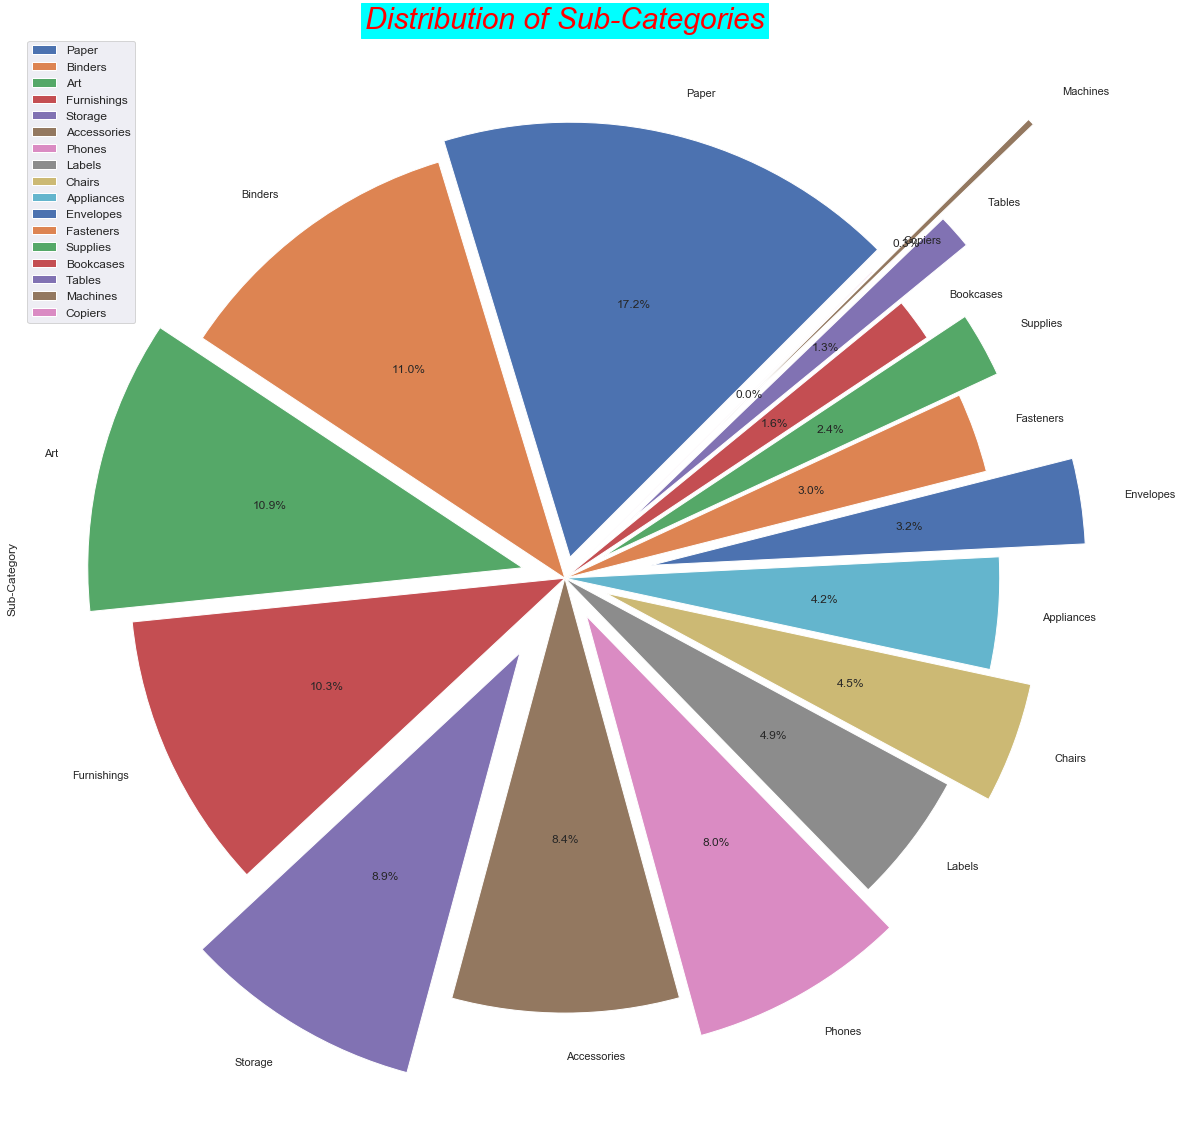

In [32]:
# Pie-chart of Sub-categories
plt.figure(figsize=(25,20))
data2['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%",startangle=45,explode=(0.05,0,0.1,0,0.2,0,0.1,0,0.1,0,0.2,0,0.1,0,0.2,0.5,0)) 
plt.legend(loc=2, fontsize='medium')
plt.title(label="Distribution of Sub-Categories", fontsize='30', fontstyle='oblique',color='red',backgroundcolor='cyan')

plt.show()



__The store has wide variety of paper, followed by binders and others. The least variety is found for machines and our new dataset contains zero variety of copiers.__

__I've used the explode function above for pie chart to prevent overlapping and make it look better.__

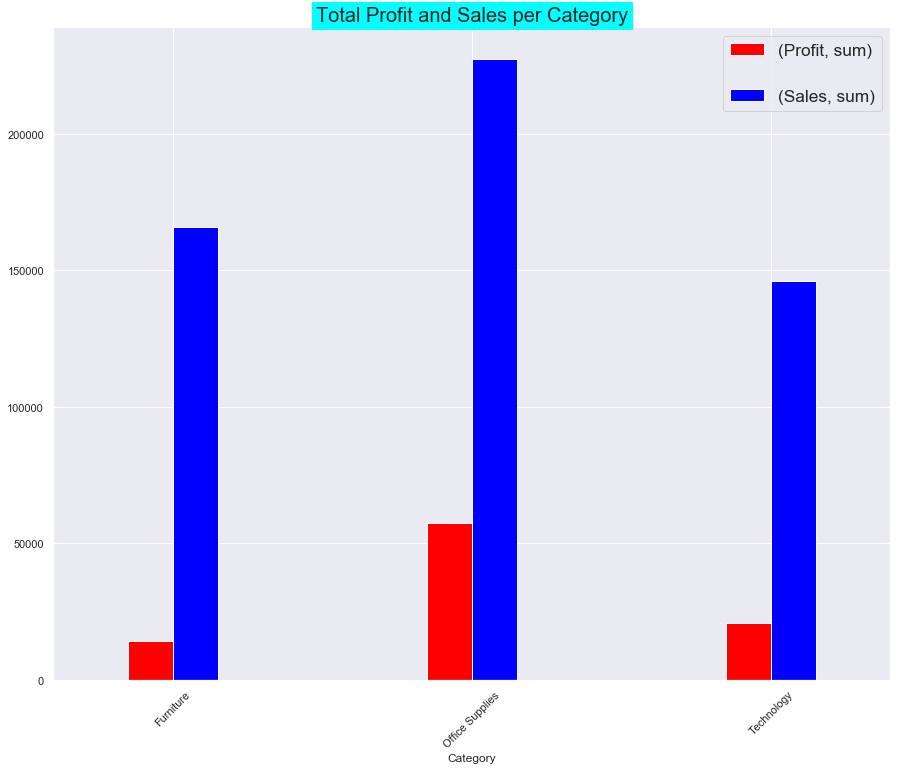

In [33]:
#Profit and Sales per Category
data2.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(rot=45,figsize=(15,12),color={'blue','red'}, width=0.3)
plt.legend(loc=1,fontsize='x-large',labelspacing=1.8)
plt.title('Total Profit and Sales per Category', fontsize=20, backgroundcolor='cyan')
plt.show()

__The sales and profit achieved for office supplies is the most. Even though the sales of furniture is more than sales in technology category, the profit is more on the latter part which is not a good sign. Business strategies must be upgraded so as to increase the profits in furniture section acccordingly. This might include decreasing discounts or any primary costs of production. A thorough operational research might help.__

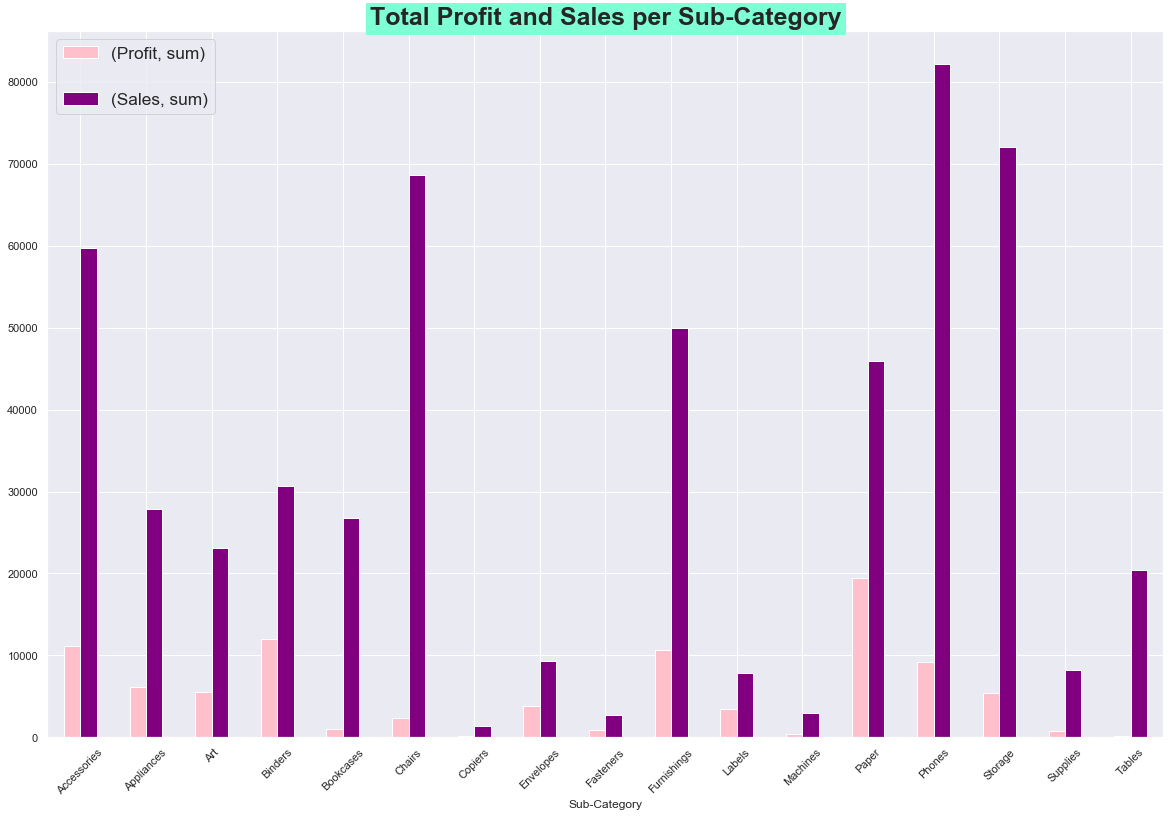

In [34]:
#Profit and Sales per Sub-category
data2.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(rot=45,figsize=(20,13),color={'pink','purple'})
plt.title('Total Profit and Sales per Sub-Category',fontweight ='bold', fontsize=25, backgroundcolor='aquamarine')
plt.legend(loc=2,fontsize='x-large',labelspacing=1.8)
plt.show()

__The maximum profit is obtained through paper which has around average sales. Maximum sales is done in phone sub-category which isn't providing an attractive profit. Hence modifications must be made in prices and other primary costs. Sales of tables and bookcases are looking good overall but the profits earned in these sales aren't upto the mark at all. These sections need a serious price action through operational research.__

Text(0.5, 1.0, 'Region-wise count of categorical sales')

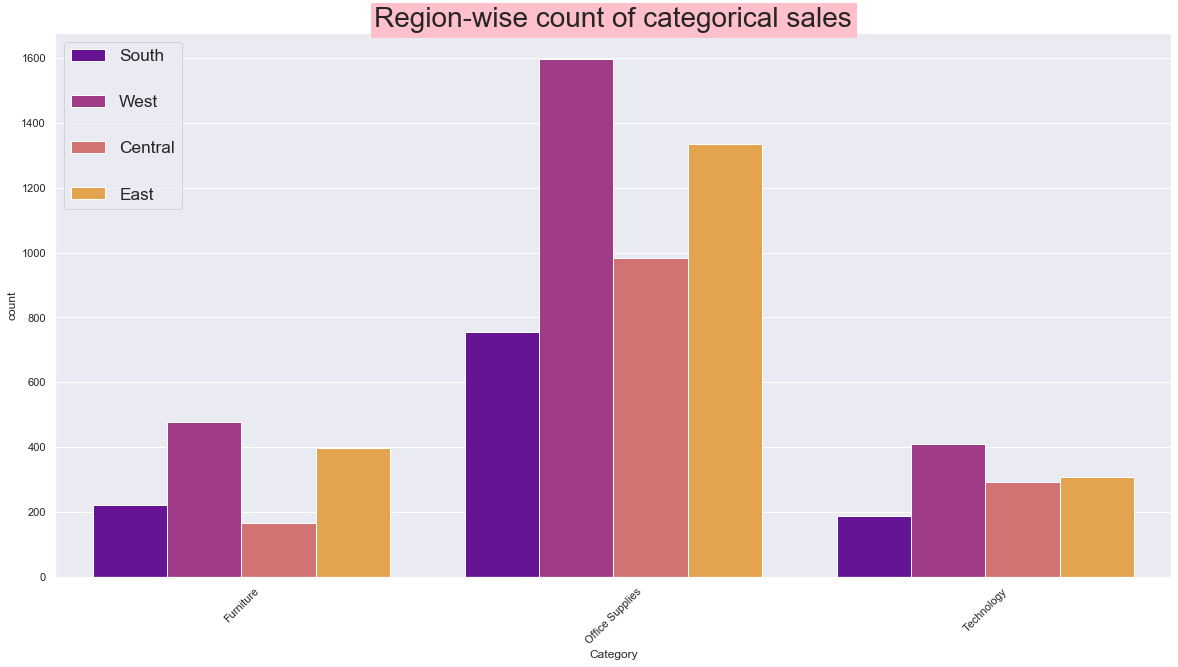

In [35]:
# region-wise count of categorical sales
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x="Category", hue="Region", data=data2,palette='plasma')
plt.xticks(rotation=45)
plt.legend(loc=2, fontsize='x-large', labelspacing=1.8)
plt.title("Region-wise count of categorical sales", fontsize=28, backgroundcolor='pink')



__There is maximum sale of office supply in every region of the country. Western region buys the most from every category. A closer look into sub-categories is needed.__

Text(0.5, 1.0, 'Regionwise count of sub-categorical sales')

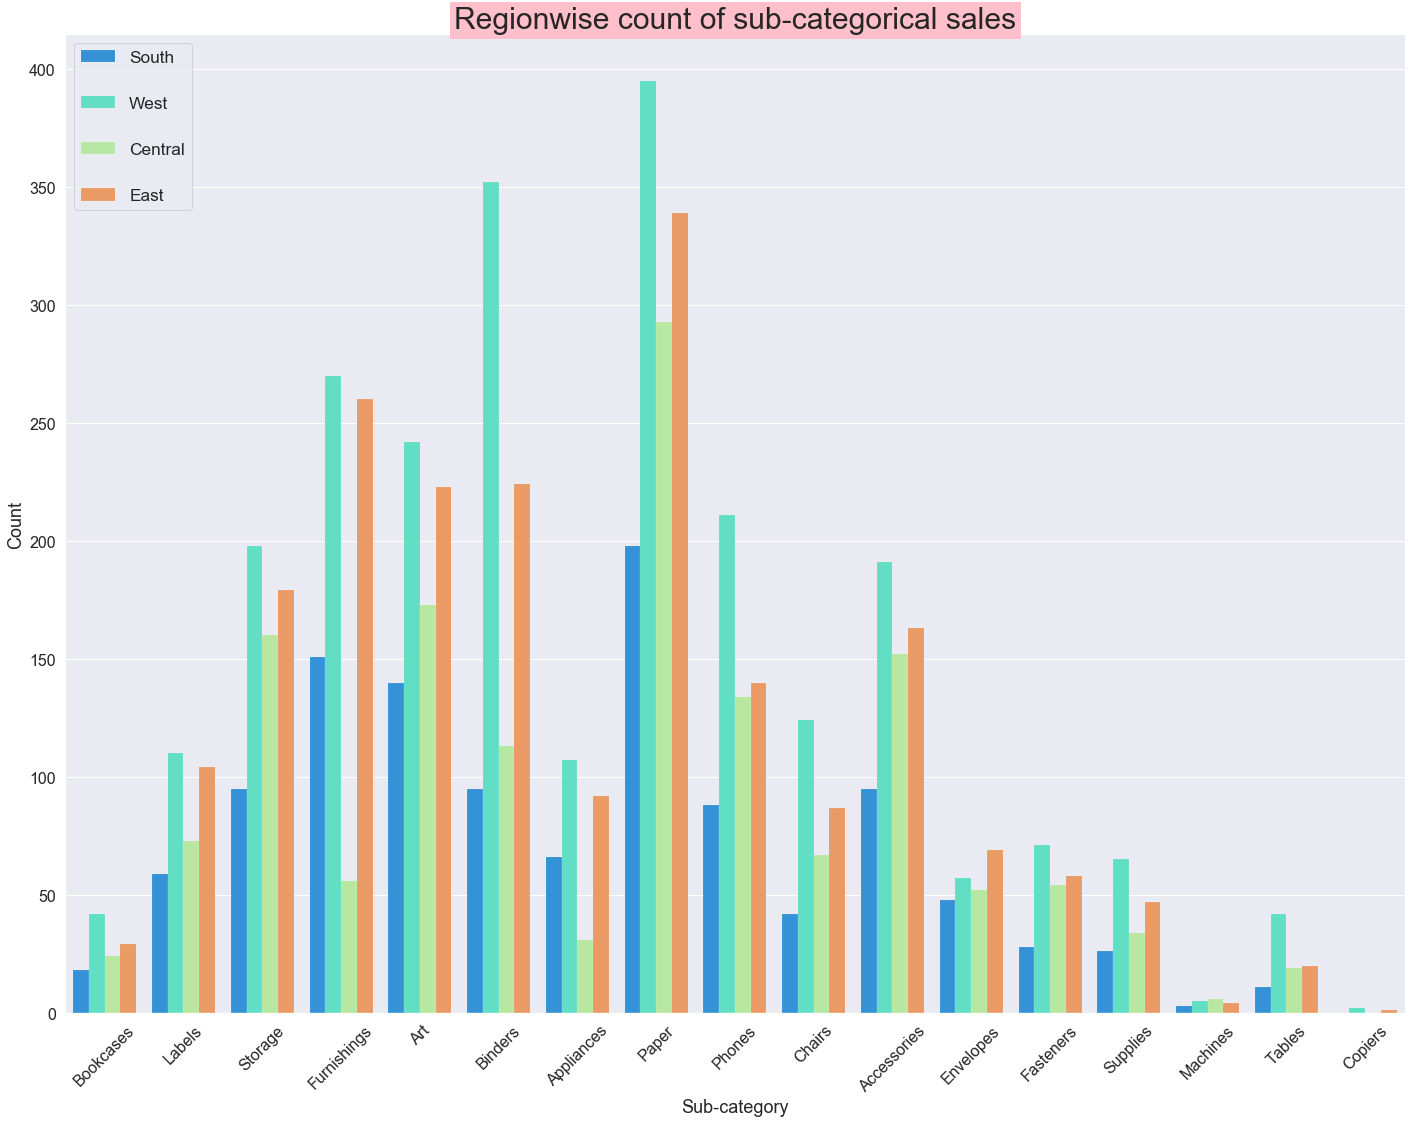

In [36]:
#regionwise count of sub-category sales
sns.set(rc={'figure.figsize':(24,18)})
sns.countplot(x="Sub-Category", hue="Region", data=data2,palette='rainbow',linewidth=0.1)
plt.xticks(rotation=45, fontsize=16)
plt.xlabel("Sub-category", fontsize=18)
plt.yticks( fontsize=16)
plt.ylabel("Count",fontsize=18)
plt.legend(loc=2,fontsize='x-large',labelspacing=1.8)
plt.title("Regionwise count of sub-categorical sales", fontsize=30,backgroundcolor='pink')






__The people in western parts of the country tend to buy more as seen from the above graph. Therefore more attention must be paid for increasing sales in the other regions as well, especially in the souther region. Paper sales are booming in every region of the country. Most envelopes are sold in the eastern region of the country, whereas most machines are sold in central regions of the country.__

In [37]:
import warnings
warnings.filterwarnings("ignore")
# 'Total Cost' and 'Profit percentage' will help understand the data better.
data2['Cost']=data2['Sales']-data2['Profit']
data2['Profit %']=(data2['Profit']/data2['Cost'])*100
data2


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136,220.0464,19.047619
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714,7.7486,88.679245
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164,19.8516,12.676056
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694,34.6906,40.845070
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656,5.3144,36.986301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Standard Class,Corporate,Athens,Georgia,South,Technology,Phones,206.100,5,0.0,55.6470,150.4530,36.986301
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028,21.1452,19.402985
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332,76.3268,20.481928
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932,239.1828,8.108108


In [38]:
#Understanding correlation between the previous numeric factors and new ones

(6.0, 0.0)

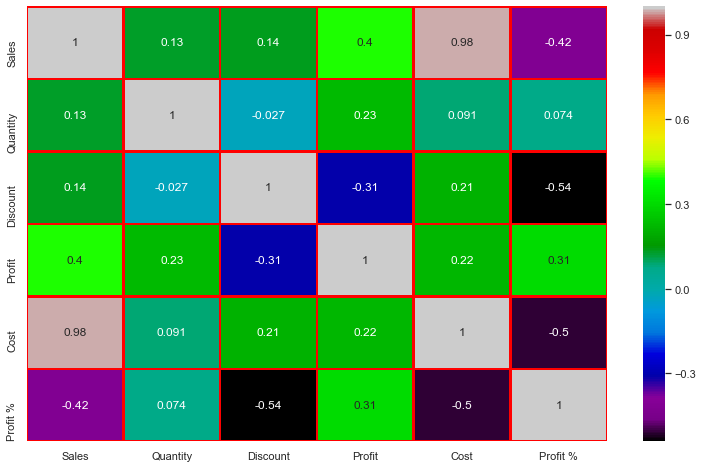

In [39]:
#creating a correlation heatmap
fig = plt.figure(figsize=(13,8))

sns.heatmap(data2.corr(),cmap='nipy_spectral', annot=True, linecolor='red', linewidths=1.5,)

b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t)

There is a strong positive correlation between cost and sales indicating an obvious insight that an increase in cost would increase the selling cost(here sales).There's again no other strongly positive or stronly negative correlation as such. We can see negative correlations between discount and quantity, discount and profit and hence profit percentage, cost and profit percentage AND sales and profit percentage. All these negative correlations indicate that a slight increase(decrease) in one factor of the above pairs would lead to a slight decrease(increase) in the other factor of the pair, which seems absolutely logical with every pair. <br>
__Solutions: <br>
(1) The cost must be reduced so as to increase profits and discounts must also be reduced a bit at the same time. This might reflect in the increase of profits slightly. <br>
(2) The slight negative correlation between discount and quantity must be worked upon to make it positive. An increase in discount or a discount at all should be given to a larger quantity or larger sales(selling price). This would help in increasing profits and quantity at the same time.__

In [40]:
# Kernel Density Estimation for quantity and discount

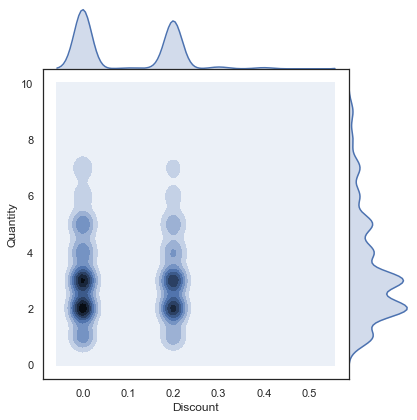

In [41]:
sns.set_style('white')

sns.jointplot(data2.Discount, data2.Quantity, kind='kde', space=0);

__The above kernel density estimation shows that maximum discounts are given upon 2-3 quantities. Also observe that generally people buy somewhere between 2-4 quantities. Increasing the discount range would help increase the number of quantities sold.<br> The maximum discount provided is somewhere around 80% and maximum quantity sold is around 13-14.__

<br>

__Let's have a look at the types of shipmodes.__


In [42]:
# Number of products for each Ship Mode
data2['Ship Mode'].value_counts()

Standard Class    4239
Second Class      1405
First Class       1098
Same Day           385
Name: Ship Mode, dtype: int64

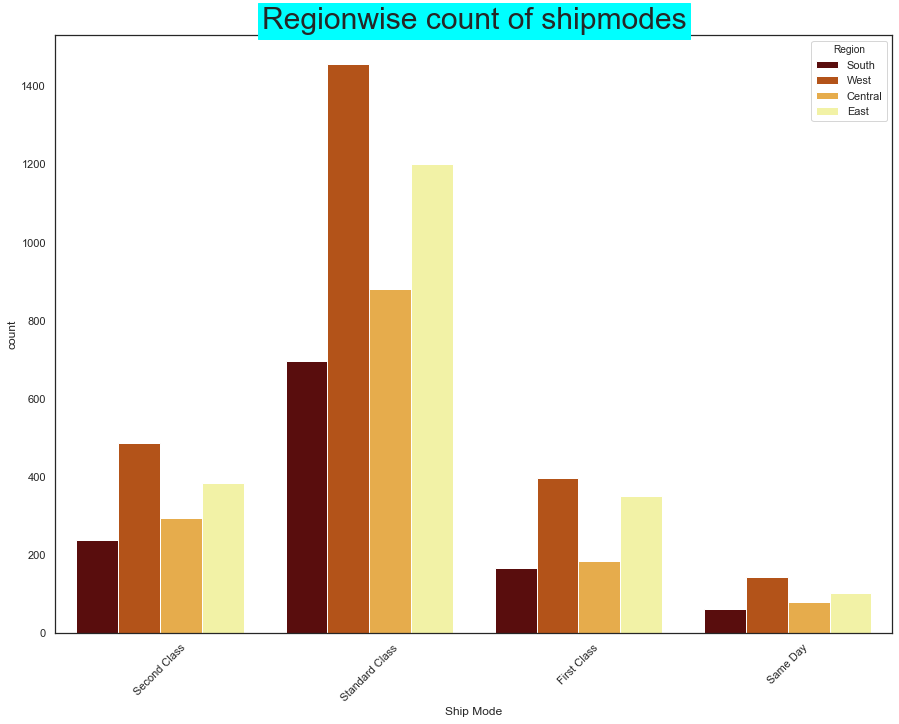

In [43]:
#Count of Ship Modes region wise
plt.figure(figsize=(15,11))
sns.countplot(x="Ship Mode", hue="Region", data=data2,palette='afmhot')
plt.xticks(rotation=45)
plt.title("Regionwise count of shipmodes", fontsize=30, backgroundcolor='cyan')
plt.show()

__The 'standard class' shipping mode is preferred largely all over the country and 'Same Day' mode is the least preferred. Most of the shipping is done for western regions of the country, followed by eastern, central and southern.<br> It seems that western regions might also consider same day shipping mode more frequently since it's the least time consuming mode and this region gets most of the shipped goods.Some attractive membership offers or discounted same day shipping prices can be provided for favourable sales(selling costs) or quantities. This might lead to increase in sales and some extra profits.__


# An insight into accquired profits .

Text(0, 0.5, 'Profit %')

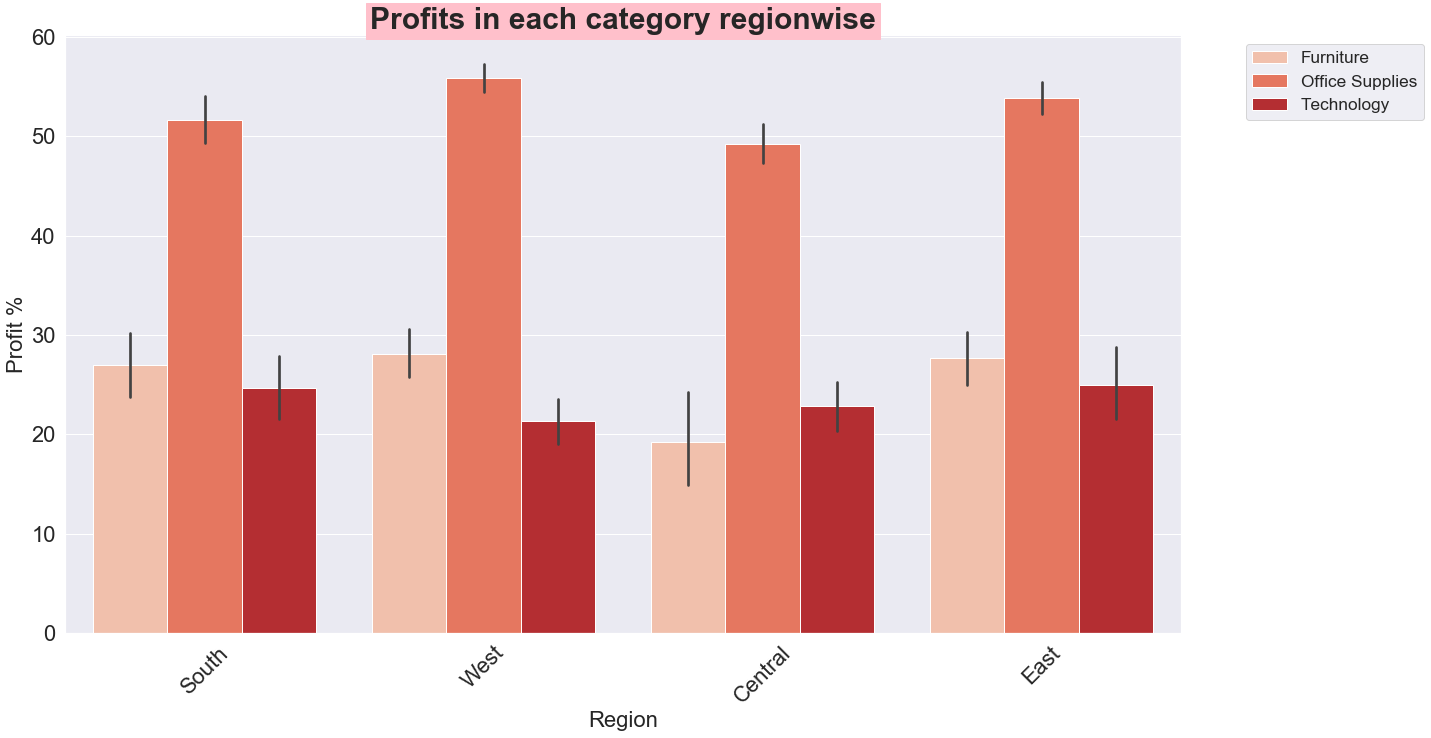

In [44]:
#Profit % in different Regions according to Category
sns.set(rc={'figure.figsize':(20,11)})
sns.barplot(x="Region", y="Profit %", hue="Category", data=data2, palette="Reds", estimator=np.mean)
plt.legend(fontsize='x-large',loc=2,bbox_to_anchor=(1.05,1))
plt.title('Profits in each category regionwise', fontweight='bold', fontsize=30, backgroundcolor='pink')
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel("Region", fontsize=22)
plt.ylabel("Profit %",fontsize=22)

__In every region, office supplies provide most of the profits, followed by furniture and then technology. The central region however provides more profits from technology than from furniture. The same pattern might be followed by sub-categories.__

Text(0.5, 1.0, 'Statewise Sales')

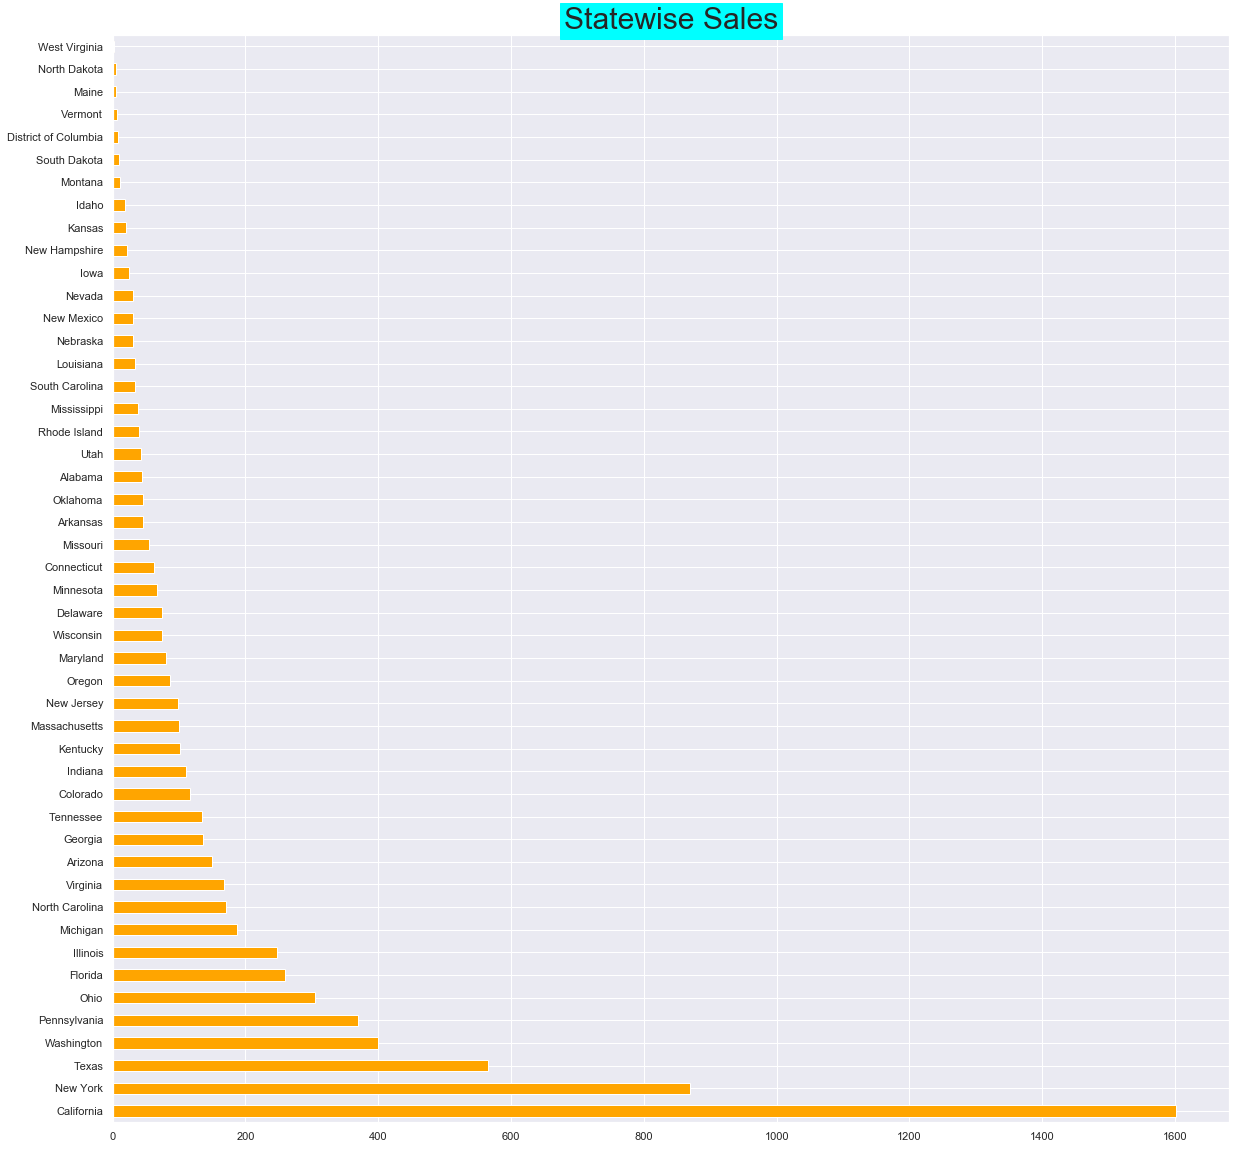

In [45]:
#state-wise plot for sales
plt.figure(figsize=[20,20])
data2['State'].value_counts().plot.barh(color='orange')
plt.title("Statewise Sales", fontsize=30, backgroundcolor='cyan')

__California has maximum sales with profits, followed by New York and so on. States with the least sales require attention.__

In [46]:
#city-wise performance
data2['City'].value_counts()

New York City     708
Los Angeles       599
San Francisco     407
Philadelphia      339
Seattle           338
                 ... 
Linden              1
Clifton             1
Davis               1
Palatine            1
Mount Pleasant      1
Name: City, Length: 508, dtype: int64

__New york city is the top performer, followed by Los Angeles, while the lowest performers being College Station, Davis,etc.__

In [47]:
data2['Segment'].value_counts()

Consumer       3725
Corporate      2137
Home Office    1265
Name: Segment, dtype: int64

__Most of the activity occurs in Consumer segment, followed by Corporate and Home office.__

Text(0.5, 1.0, 'Sales of each category under different segments')

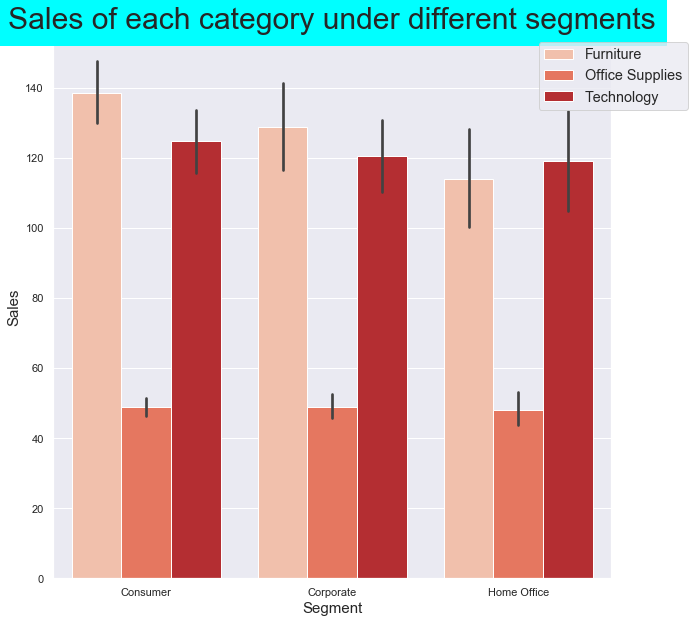

In [48]:
#Sales of each Category under different Segments
plt.figure(figsize=(10,10))
sns.barplot(x="Segment", y="Sales", data=data2, palette="Reds",hue='Category',estimator=np.mean)
plt.legend(bbox_to_anchor=(1.15,1), fontsize='large')
plt.xlabel("Segment",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.title("Sales of each category under different segments", backgroundcolor='cyan', fontsize=30)

__(1) Consumer segment is more interested in buying furniture, followed by technology and office supplies.<br>(2) Corporate segment buys more of furniture, followed by technology and office supplies, which is the same pattern as followed by consumer segment.<br>(3) Home Ofifce segment buys more of technology, followed by furniture and office supplies.<br><br> All 3 segments do not give much importance to office supplies. Strategies must be formed so as to increase sales of office supplies in the corporate and home office segments.__

Text(0.5, 1.0, 'Profits of each category under different segments')

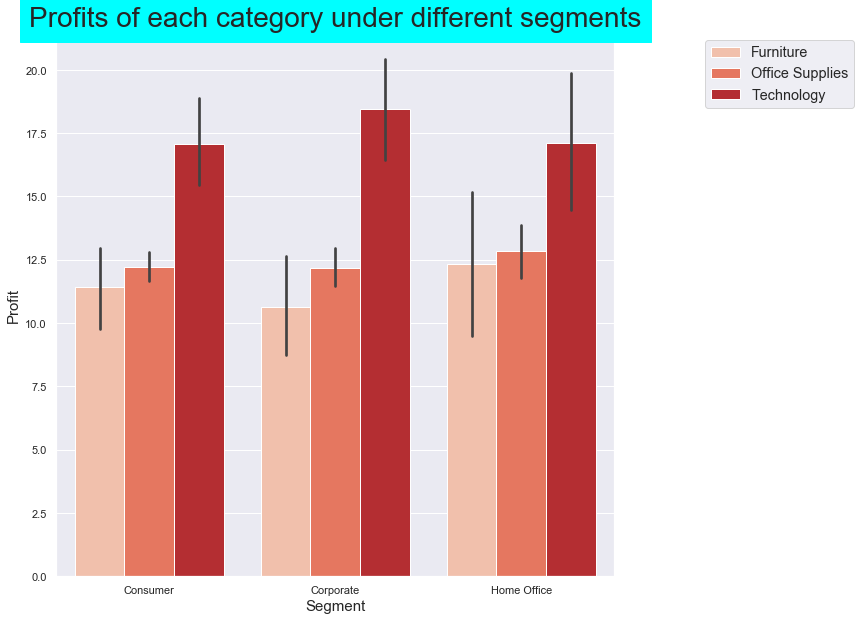

In [49]:
#Profits of each Category under different Segment
plt.figure(figsize=(10,10))
sns.barplot(x="Segment", y="Profit", data=data2, palette="Reds",hue='Category',estimator=np.mean)
plt.legend(bbox_to_anchor=(1.15,1), fontsize='large')
plt.xlabel("Segment",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.title("Profits of each category under different segments", backgroundcolor='cyan', fontsize=28)

Text(0.5, 1.0, 'Sales by each segment under different shipping modes')

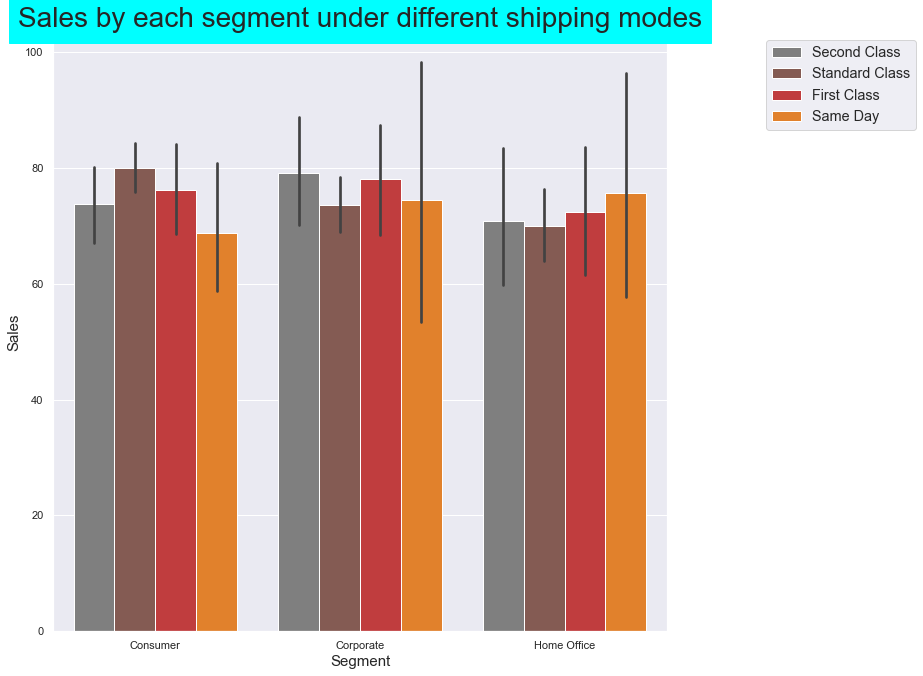

In [50]:
#Sales for each segment with different shipping modes
plt.figure(figsize=(11,11))
sns.barplot(x="Segment", y="Sales", data=data2, palette="tab10_r",hue='Ship Mode',estimator=np.mean)
plt.legend(bbox_to_anchor=(1.15,1), fontsize='large')
plt.xlabel("Segment",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.title("Sales by each segment under different shipping modes", backgroundcolor='cyan', fontsize=28)

__(1) Consumer segment is least interested in same day shipping mode, preceded by second class, first class and standard class being the most preferable.<br>(2) Corporate segment prefers second class the most, followed by first class, same day shipping and standard shipping.<br>(3) Home office segment prefers same day shipping the most unlike other two segments,followed by first class, second class and standard class.__

Text(0.5, 1.0, 'Sales under each segment in different regions')

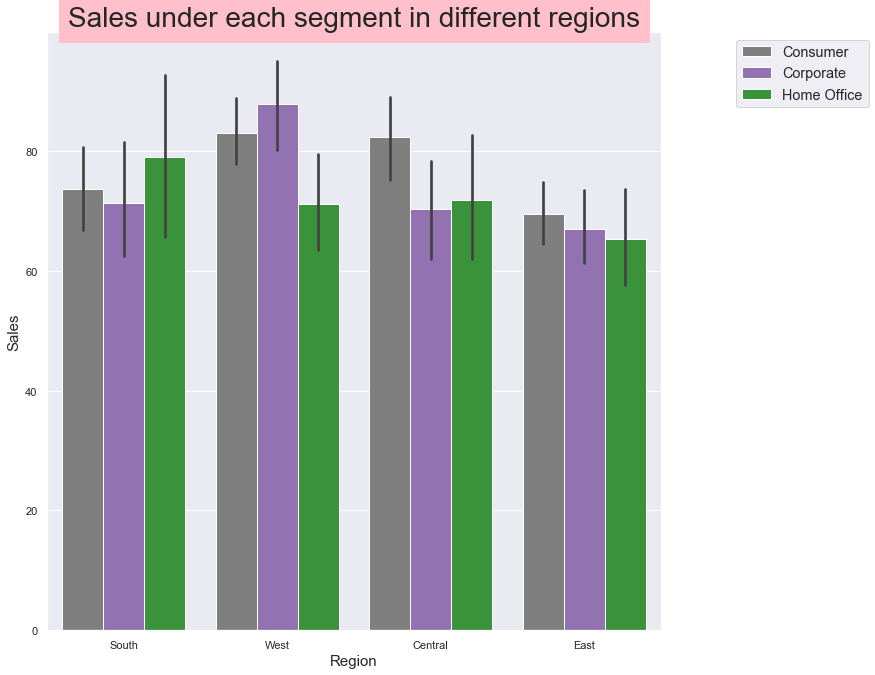

In [51]:
#Sales under each segment in different regions
plt.figure(figsize=(11,11))
sns.barplot(x="Region", y="Sales", data=data2, palette="tab10_r",hue='Segment',estimator=np.mean)
plt.legend(bbox_to_anchor=(1.35,1), fontsize='large')
plt.xlabel("Region",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.title("Sales under each segment in different regions", backgroundcolor='pink', fontsize=28)

Text(0.5, 1.0, 'Profits under each segment in different regions')

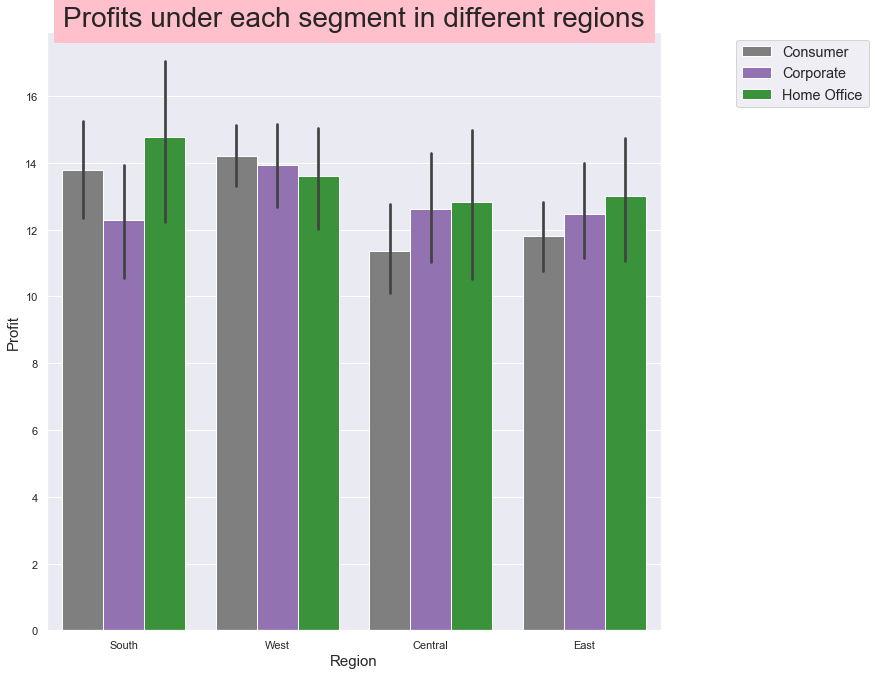

In [52]:
#Profits under each segment in different regions
plt.figure(figsize=(11,11))
sns.barplot(x="Region", y="Profit", data=data2, palette="tab10_r",hue='Segment',estimator=np.mean)
plt.legend(bbox_to_anchor=(1.35,1), fontsize='large')
plt.xlabel("Region",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.title("Profits under each segment in different regions", backgroundcolor='pink', fontsize=28)

__From the above 2 graphs we can clearly find out that given a region, for instance central region maximum sales is done for the consumer segment even though the profits from this segment in central region is the lowest as comapared to other two segments. The store needs to look after this and other such imbalances.__

# END